In [1]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import islice

In [2]:
from functions.functions_under_study import var

In [3]:
# Data interpolation Enable.
iterpEnable = True
N_points = 10000
Ri = 20

In [4]:
file_list = ['uncoated', 'coated']
N = len(file_list)
import_data = np.empty(N, dtype=object)
for n, file_name in enumerate(file_list):
    import_data[n] = np.loadtxt('AP300/' + file_name + '.dat', skiprows=1)
    # Data descaling.
    import_data[n][:,var.mag_db.value] += 20*np.log10(Ri)
    import_data[n][:,var.ph_deg.value] = np.unwrap(import_data[n][:,var.ph_deg.value]*np.pi/180 + np.pi)*180/np.pi

In [5]:
data = np.empty(N, dtype=object)
for n in range(N):
    if iterpEnable:
        data[n] = np.zeros((N_points, len(var)))
        data[n][:,var.freq.value] = np.logspace(np.log10(min(import_data[n][:,var.freq.value])),
                                                np.log10(max(import_data[n][:,var.freq.value])),
                                                N_points)
        for k in islice(var, var.mag_db.value, None):
            data[n][:,k.value] = np.interp(data[n][:,var.freq.value],
                                            import_data[n][:,var.freq.value],
                                            import_data[n][:,k.value])
    else:
        data[n] = import_data[n].copy()

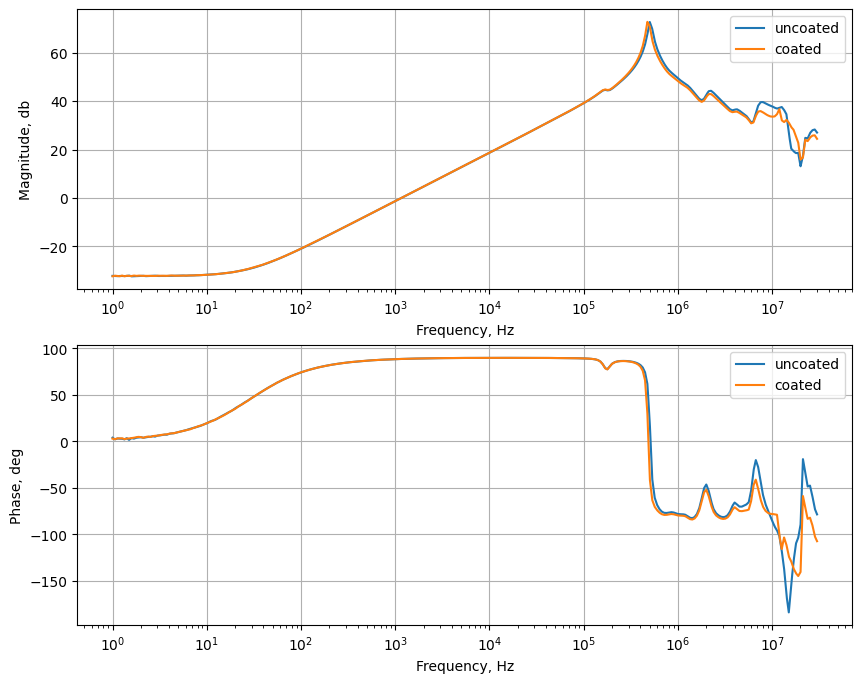

In [ ]:
user_ylabel = ['Magnitude, db', 'Phase, deg']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
for idx in range(2):
    ax = axes[idx]
    for n in range(N):
        ax.plot(data[n][:, var.freq.value], data[n][:, idx + 1], label=file_list[n])
    ax.set_xscale('log')
    ax.legend()
    ax.set_xlabel('Frequency, Hz')
    ax.set_ylabel(user_ylabel[idx])
    ax.grid(True)

plt.show()

In [7]:
# Parameters.
L_b = 136e-6
r_b = 25e-3
C_b = 725e-12
#C_b = 1.0
R_b = 6e3

In [ ]:
from functions.functions_under_study import 

In [9]:
N_DATA = 0
user_fontsize = 14

L_sel = 1.0
r_sel = 1.0
C_sel = 1.0

# Инициализируем коэффициенты.
w_coeff_1 = np.array([0.9, 1.1, 1.2])

In [10]:
# Принимаем шаг в 1% относительно начального приближения и вводим соответствующие приращения.
w_step = 0.00001 * w_coeff_1
w_coeff = w_coeff_1 - w_step
w_coeff_2 = w_coeff_1 + w_step

# Массивы для каждой переменной отдельно.
x1 = [w_coeff[0], w_coeff_1[0], w_coeff_2[0]]
x2 = [w_coeff[1], w_coeff_1[1], w_coeff_2[1]]
x3 = [w_coeff[2], w_coeff_1[2], w_coeff_2[2]]

# Конвертируем в сетку.
X1, X2, X3 = np.meshgrid(x1, x2, x3, indexing='ij')

# Формируем массив значений функции потерь, для вычисления градиента.
# Initialize array to store loss values.
loss_func_grad = np.zeros_like(X1)
# Compute loss at each point in the grid.
# Note: This loop can be slow for large grids. Vectorization is better if possible.
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        for k in range(X1.shape[2]):
            w_local = [X1[i,j,k], X2[i,j,k], X3[i,j,k]]
            loss_func_grad[i,j,k] = loss_func(
                freq=data[N_DATA][:, var.freq.value],
                y=data[N_DATA][:, var.mag_db.value],
                w=w_local)
# ВАЖНО! Шаг перечисляем в ПРЯМОМ порядке (в отличии от случая перечисления переменных).
grad_grid = np.gradient(loss_func_grad, w_step[0], w_step[1], w_step[2])
grad = np.zeros((len(grad_grid),))
# Выбираем значение в самом центре окрестности.
for idx, grad_axis in enumerate(grad_grid):
    grad[idx] = grad_axis[1][1,1]

grad_norm = np.linalg.norm(grad, ord=None, axis=None)

In [11]:
loss_func(
                freq=data[N_DATA][:, var.freq.value],
                y=data[N_DATA][:, var.mag_db.value],
                w=w_local) / len(data[N_DATA][:, var.freq.value])

11.768056969416127

In [12]:
grad1 = grad_func(
    freq=data[N_DATA][:, var.freq.value],
    y=data[N_DATA][:, var.mag_db.value],
    w=w_coeff_1)
grad_norm1 = np.linalg.norm(grad1, ord=None, axis=None)

In [13]:
print(grad)
print(grad1)
print(grad_norm)
print(grad_norm1)

[-426088.00476672   23823.24799758 -113844.32936514]
[-3.13284487e+09  9.52929920e+05 -1.57004820e+14]
441677.55917619437
157004820487541.16


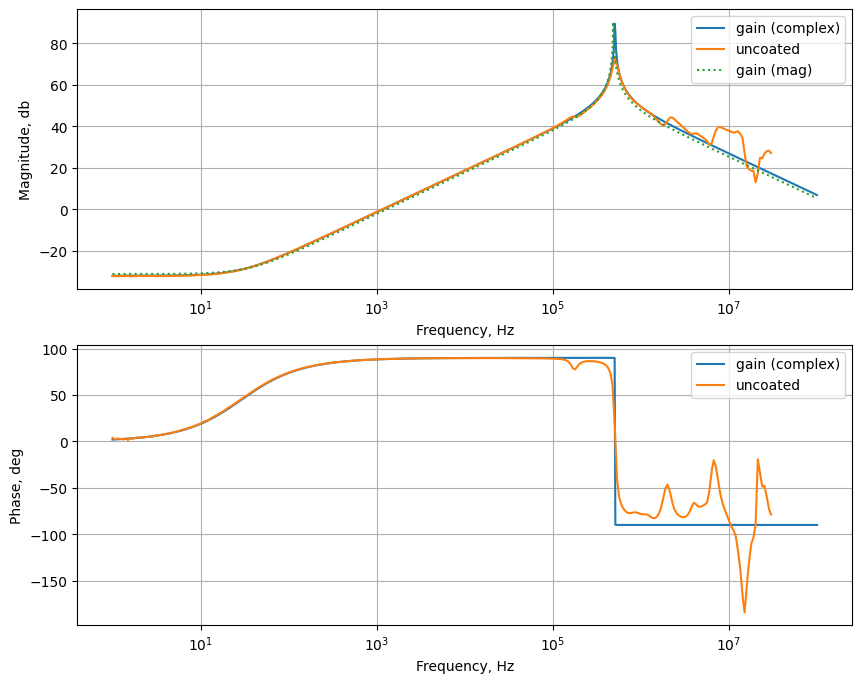

In [14]:
# Create frequency array.
N = int(1e3)
f_min = 1
f_max = 100e6
freq = np.logspace(np.log10(f_min), np.log10(f_max), N)
#freq = data[N_DATA][:, var.freq.value]

abs_phase_dataset = reactor_model_gain(    freq, L_sel*L_b, r_sel*r_b, C_sel*C_b)#, R)
abs_dataset       = reactor_model_gain_abs(freq, w_coeff_1[0]*L_b, w_coeff_1[1]*r_b, w_coeff_1[2]*C_b)#, R)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
for idx, ax in enumerate(axs):
    ax.plot(freq, abs_phase_dataset[idx], label='gain (complex)')
    ax.plot(data[N_DATA][:, var.freq.value], data[N_DATA][:, idx + 1], label=file_list[N_DATA])
    if idx == 0:
        ax.plot(freq, abs_dataset, ':', label='gain (mag)')
    ax.set_xscale('log')
    ax.legend()
    ax.set_xlabel('Frequency, Hz')
    ax.set_ylabel(user_ylabel[idx])
    ax.grid(True)
plt.show()